In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train=pd.read_csv('../Data/digit/train.csv')
xtrain=train.drop(columns=['label']).values
ytrain=train['label'].values

In [7]:
test=pd.read_csv('../Data/digit/test.csv')
xtest=test.values

In [10]:
xtrain.shape

(42000, 784)

In [11]:
xtest.shape

(28000, 784)

In [12]:
# 28 x 28  -> 784

784

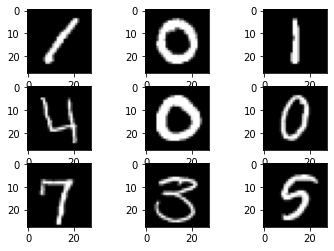

In [20]:
for i in range(9):
    plt.subplot(3,3,i+1)
    #plot the pixel data
    plt.imshow(xtrain[i].reshape(28,28),cmap=plt.get_cmap('gray'))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [23]:
scaled_xtrain=scaler.transform(xtrain)
scaled_xtest=scaler.transform(xtest)

In [24]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(scaled_xtrain)

PCA()

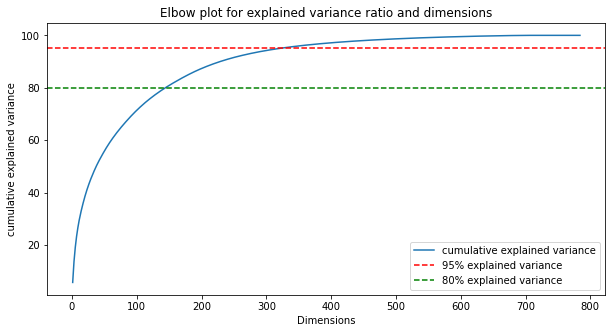

In [27]:
#for ploting this, converting eigen values in percentage 
val=np.cumsum(pca.explained_variance_ratio_)*100
plt.figure(figsize=(10,5))
plt.plot(range(1,len(val)+1),val,label="cumulative explained variance")
plt.axhline(y=95,color='r',linestyle='--',label="95% explained variance ")
plt.axhline(y=80,color='g',linestyle='--',label="80% explained variance ")
plt.title("Elbow plot for explained variance ratio and dimensions")
plt.xlabel("Dimensions")
plt.ylabel("cumulative explained variance")
plt.legend()

In [28]:
pca=PCA(0.95)
pca.fit(scaled_xtrain)

pca_xtrain=pca.transform(scaled_xtrain)
pca_xtest=pca.transform(scaled_xtest)

In [33]:
pca.n_components_

320

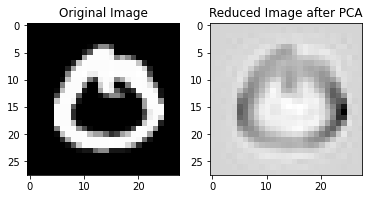

In [40]:
#plot the pixel data
sample1=xtrain[23].reshape(28,28)
a=plt.subplot(1,2,1)
a.set_title("Original Image")
plt.imshow(sample1,cmap=plt.get_cmap('gray'))

sample2=pca.inverse_transform(pca_xtrain[23]).reshape(28,28)
b=plt.subplot(1,2,2)
b.set_title("Reduced Image after PCA")
plt.imshow(sample2,cmap=plt.cm.gray_r)

In [43]:
from sklearn.linear_model import LogisticRegression
import datetime
model=LogisticRegression()
start=datetime.datetime.now()
model.fit(pca_xtrain,ytrain)
end=datetime.datetime.now()
total=end-start
print("Time taken for training  the model:",total)

Time taken for training  the model: 0:00:06.829345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
start=datetime.datetime.now()
ypred_test=model.predict(pca_xtest)
end=datetime.datetime.now()
total=end-start
print("Time taken for Testing  the model:",total)

Time taken for Testing  the model: 0:00:00.050386


In [45]:
ypred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [46]:
start=datetime.datetime.now()
ypred_train=model.predict(pca_xtrain)
end=datetime.datetime.now()
total=end-start
print("Time taken for Testing  the model:",total)

Time taken for Testing  the model: 0:00:00.056880


Accuracy is  0.9383333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4132
           1       0.97      0.98      0.97      4684
           2       0.93      0.93      0.93      4177
           3       0.92      0.91      0.92      4351
           4       0.95      0.94      0.94      4072
           5       0.91      0.90      0.90      3795
           6       0.96      0.97      0.96      4137
           7       0.95      0.94      0.95      4401
           8       0.91      0.90      0.91      4063
           9       0.92      0.92      0.92      4188

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000



<AxesSubplot:>

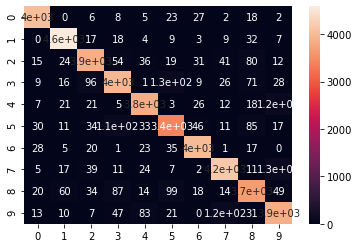

In [50]:
#evaluation on training set
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is ",accuracy_score(ytrain,ypred_train))
print(classification_report(ytrain,ypred_train))
cm=confusion_matrix(ytrain,ypred_train)
sns.heatmap(cm,annot=True)

In [53]:
labels=pd.read_csv('../Data/digit/test_labels.csv')
label=labels["label"]

Accuracy is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00      3288
           2       1.00      1.00      1.00      2755
           3       1.00      1.00      1.00      2771
           4       1.00      1.00      1.00      2765
           5       1.00      1.00      1.00      2524
           6       1.00      1.00      1.00      2748
           7       1.00      1.00      1.00      2899
           8       1.00      1.00      1.00      2687
           9       1.00      1.00      1.00      2786

    accuracy                           1.00     28000
   macro avg       1.00      1.00      1.00     28000
weighted avg       1.00      1.00      1.00     28000



<AxesSubplot:>

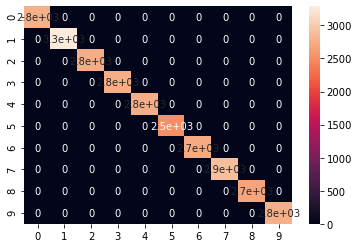

In [56]:
#evaluation on testing set
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is ",accuracy_score(label,ypred_test))
print(classification_report(label,ypred_test))
cm=confusion_matrix(label,ypred_test)
sns.heatmap(cm,annot=True)

In [57]:
1080 * 1080

1166400